In [46]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

In [47]:
rootdir = './Data_cfar10'
T = datasets.CIFAR10(rootdir,train=True,download=True)
V = datasets.CIFAR10(rootdir,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [48]:
len(T)

50000

In [49]:
len(V)

10000

In [50]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [51]:
X,y = T[12]

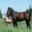

In [52]:
X

In [53]:
T.classes[y]

'horse'

In [54]:
np.array(X).shape
#todo converting the image to a 1D array

(32, 32, 3)

In [55]:
32*32*3
#todo  after multiplication of 32*32*3 we get 3072 which is the inputdimenion

3072

In [56]:
T = datasets.CIFAR10(rootdir,train=True,download=True,
                    transform=transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,
                    transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [57]:
tL = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True,drop_last=True)
vL = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True,drop_last=True)

In [58]:
model = nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)

In [59]:
loss_fn = nn.NLLLoss()

In [60]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, len(tL))

In [61]:
nepochs = 5
for e in range(nepochs):
    eLoss = 0
    for X,y in tL:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        eLoss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(eLoss))

1837.3052978515625
1799.118408203125
1799.1370849609375
1799.1463623046875
1799.2218017578125


In [62]:
c = 0
t = 0
with torch.no_grad():
    for Xv,yv in vL:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,dim=1)
        t+=yv.shape[0]
        c+=int((p==yv).sum())
print(c/t)

0.0999599358974359
